## Week1 Study Group Big Data Laboratory 2021 
### Copyright Big Data Laboratory 

## Berikut Langkah - Langkah krusial pada saat berhadapan dengan dataset baru 
### Step 1 , Identify the dataset ( Know your dataset well )
### Step 2 , Ask The Right Questions ( Tanyain terus itu dataset )
### Step 3 , Build The Model 
### Step 4 , Find Vulnerabilites ( Cari Cari kekurangan dari Model yang udah kalian buat )
### Step 5 , Create your Report 

In [9]:
''' Lets Import Modules First ...'''
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
print(f"numpy version : {np.__version__}")
print(f"Pandas version : {pd.__version__}")
print(f"Plotly version : {plotly.__version__}")

numpy version : 1.19.2
Pandas version : 1.1.5
Plotly version : 4.14.3


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Step 1 Know your dataset . 
- Lakuin aja Hal hal eksplorasi pada dataset 
- Siapin Domain Knowledge Yang berpotensi dibutuhkan 
- Pahami masing masing Kolom 
- Pahami *Unique* value pada kolom
- Gather As much information as you can, just like ***Information Gathering***

''' Hal Pertama Yang biasa dilakuin '''
''' Gunakan Sebuah Function ya biar kalian bisa kopas aja Kedepannya:D '''

In [3]:
"""
Hal Pertama yang biasa dilakukan, Biasain buat FUNCTION , biar kalian bisa gunain kembali 
dan hemat waktu :D	
"""

long_string = "====================================================================================="
def printBasicInformation(dataset,option = False):
	"""
	print Basic information from given dataset .

	Args:
	    dataset (DataFrame): dataframe only
	    option ( boolean ) : Check wether print all columns or not 
	"""
	if option:
		pd.set_option('display.max_columns', None)
	print("Current Dataset Inspection ....\n")
	print(f"Total Observation / Row : {dataset.shape[0]}")
	print(f"Total Column / Col : {dataset.shape[1]}")

	print(long_string)
	print(f"Column Name : {list(dataset.columns)}")

	print(long_string)
	print(f"is There any NaNs : {dataset.isna().sum().sum()} Nans Found")
	print(f"Checking All columns....")

	print(long_string)
	print(f"{dataset.info()}")
	print(long_string)

	print(f"{dataset.describe()}")
	print(long_string)


printBasicInformation(df,True)

Current Dataset Inspection ....

Total Observation / Row : 418
Total Column / Col : 12
Column Name : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
is There any NaNs : 414 Nans Found
Checking All columns....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5),

Summary from column : Sex
Column type : object
NaN  : 0 From 418 Observations
Unique Labels 
['male' 'female']


C:\Users\xwyzworm\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



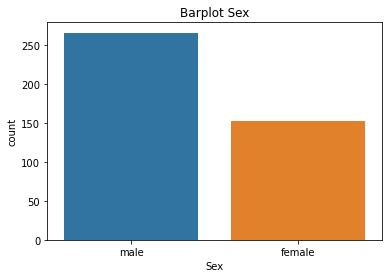

Informasi General Dataset ...
count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object


In [68]:
def identifyColumns(dataset,column,scatterPlot=False):
	print(f"Summary from column : {column}")
	print(f"Column type : {dataset[column].dtype}")
	print(long_string) 
	print(f"NaN  : {dataset[column].isna().sum()} From {len(dataset[column].values)} Observations")
	print(f"Unique Labels \n{dataset[column].unique()}")
	print(long_string)
	if(len(dataset[column].unique()) > 10):
		top10 = dataset[column].value_counts().head(10)
		#print(f"Top 10 Labels \n{top10}")
		sns.countplot(dataset[dataset[column].isin(top10.index)][column],label=column)
		plt.title(f"Barplot {column} Top 10")
		plt.show()
	else:
		sns.countplot(dataset[column],label=column)
		plt.title(f"Barplot {column}")
		plt.show()
	print(long_string)	
	print("Informasi General Dataset ...")
	print(df[column].describe())
	print(long_string)

	if(scatterPlot and dataset[column].dtype != 'object'):
		fig = go.Figure()
		fig.add_traces(go.Scatter(x = dataset[column],y=np.linspace(0,1,len(dataset[column].values)),mode='markers',name=column))
		fig.update_layout(title=f"Scatter Plot {column}",xaxis_title=column,
		yaxis_title='Range Values',height= 500,width=800)
		fig.show()
	
		 
identifyColumns(df, "Sex",True)

pandas.core.series.Series

In [91]:
def findInformationByGroupby(dataset,listOfGroups,listofFunction,colToReturn):
	"""
	Group by dataset given a listof features

	Args:
	    dataset (DataFrame): [description]
	    listOfGroups (list): [description]
	    listofFunction (list) : numpy agg function ( min, max, Sum ,count ... )
	"""

	groupCol = dataset.groupby(listOfGroups)
	aggregated = groupCol[colToReturn].agg(listofFunction)
	print(aggregated)
	print(long_string)
	fig = go.Figure()
	fig.add_traces(go.Scatter(x = aggregated.index,y = aggregated["count"],mode = 'markers',text=["Age"]*len(aggregated.index)))
	fig.show()
findInformationByGroupby(df,["Age"],["sum","count"],"Age")


          sum  count
Age                 
0.17     0.17      1
0.33     0.33      1
0.75     0.75      1
0.83     0.83      1
0.92     0.92      1
...       ...    ...
62.00   62.00      1
63.00  126.00      2
64.00  192.00      3
67.00   67.00      1
76.00   76.00      1

[79 rows x 2 columns]
